In [1]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Support Vector Regression (SVR) 

In [26]:
factors = pd.read_csv('data/whole.csv')

In [27]:
X = factors.drop(['gas_dome', 'gas_non_dome', 'gas_total'], axis=1)
y = factors['gas_dome']

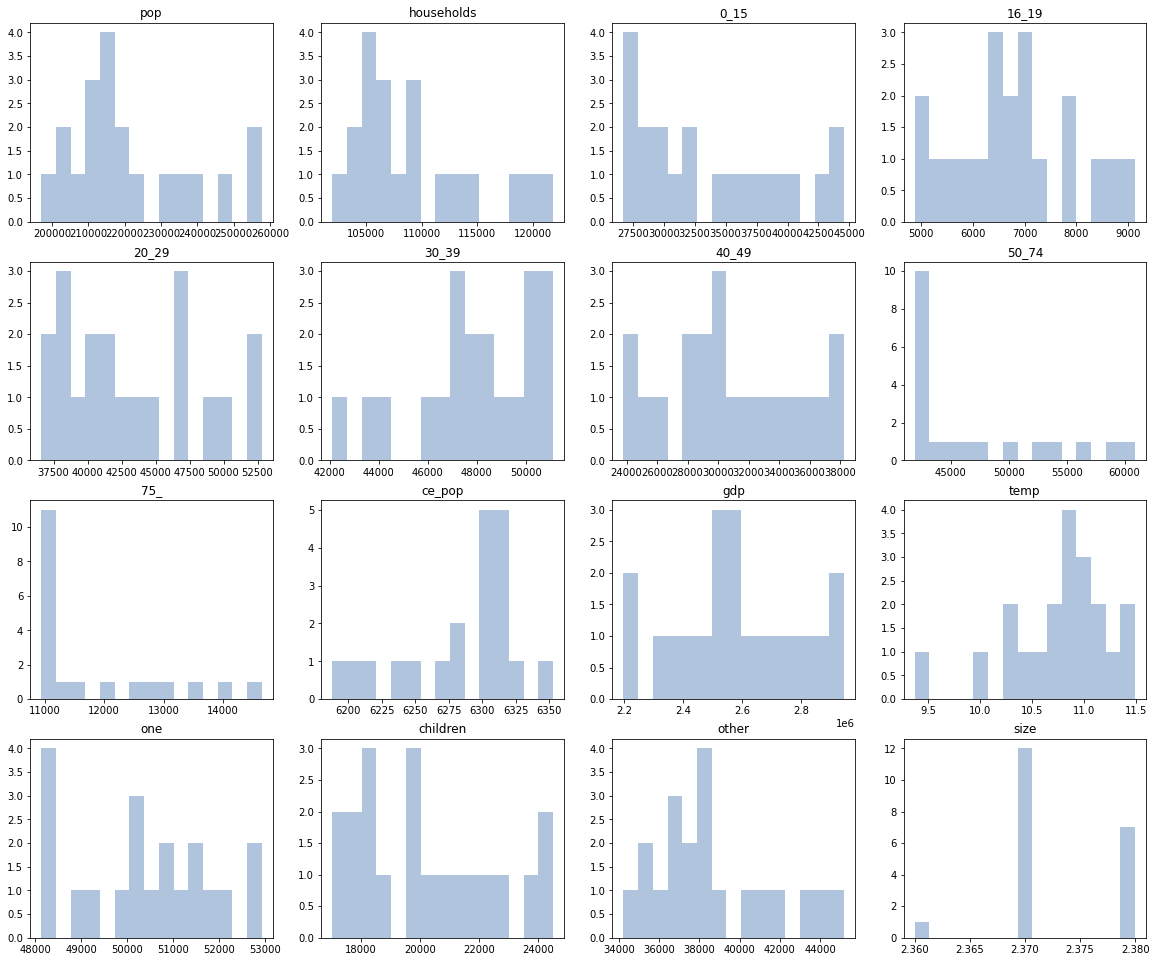

In [32]:
plt.figure(figsize=(20,30))
for ii,name in enumerate(X.columns):
    plt.subplot(7,4,ii+1)
    plt.hist(X.iloc[:,ii],15,color="lightsteelblue",alpha = 1)
    plt.title(name)

plt.subplots_adjust()
plt.show()

In [31]:
factors.columns

Index(['gas_dome', 'gas_non_dome', 'gas_total', 'pop', 'households', '0_15',
       '16_19', '20_29', '30_39', '40_49', '50_74', '75_', 'ce_pop', 'gdp',
       'temp', 'one', 'children', 'other', 'size'],
      dtype='object')

In [6]:
for i in factors.columns:
    factors[i] = factors[i].astype('float')

In [7]:
factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gas_dome      20 non-null     float64
 1   gas_non_dome  20 non-null     float64
 2   gas_total     20 non-null     float64
 3   pop           20 non-null     float64
 4   households    20 non-null     float64
 5   0_15          20 non-null     float64
 6   16_19         20 non-null     float64
 7   20_29         20 non-null     float64
 8   30_39         20 non-null     float64
 9   40_49         20 non-null     float64
 10  50_74         20 non-null     float64
 11  75_           20 non-null     float64
 12  ce_pop        20 non-null     float64
 13  gdp           20 non-null     float64
 14  temp          20 non-null     float64
 15  one           20 non-null     float64
 16  children      20 non-null     float64
 17  other         20 non-null     float64
 18  size          20 non-null     fl

In [8]:
X = factors.drop(['gas_dome', 'gas_non_dome', 'gas_total'], axis=1).values
y = factors[['gas_dome']]

In [9]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [10]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1412)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15, 16)
(15, 1)
(5, 16)
(5, 1)


In [11]:
# Fit regression model
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.01, epsilon = 0.05)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=3)

svr_rbf.fit(X_train, y_train.ravel())
svr_lin.fit(X_train, y_train.ravel())
svr_poly.fit(X_train, y_train.ravel())

y_train_rbf = svr_rbf.predict(X_train)
y_train_lin = svr_lin.predict(X_train)
y_train_poly = svr_poly.predict(X_train)

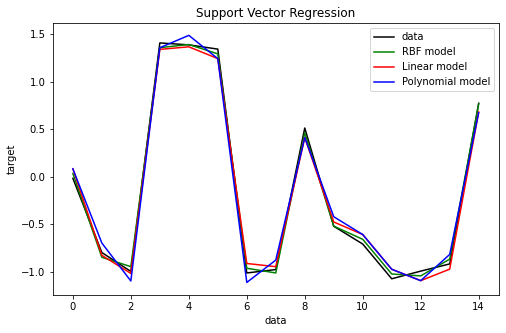

In [12]:
###############################################################################
# look at the results
import pylab as pl
pl.rcParams["figure.figsize"] = (8,5)
pl.plot(y_train, c='k', label='data')
pl.plot(y_train_rbf, c='g', label='RBF model')
pl.plot(y_train_lin, c='r', label='Linear model')
pl.plot(y_train_poly, c='b', label='Polynomial model')
pl.xlabel('data')
pl.ylabel('target')
pl.title('Support Vector Regression')
pl.legend()
pl.show()

In [13]:
y_rbf = svr_rbf.predict(X_test)
y_lin = svr_lin.predict(X_test)
y_poly = svr_poly.predict(X_test)

In [14]:
print(svr_rbf.score(X_train, y_train))
print(svr_lin.score(X_train, y_train))
print(svr_poly.score(X_train, y_train))
print()
print(svr_rbf.score(X_test, y_test))
print(svr_lin.score(X_test, y_test))
print(svr_poly.score(X_test, y_test))

0.9978614142944249
0.9932773574563508
0.9894266696792869

0.9529066455549813
0.9378769220667711
0.8679481449756085


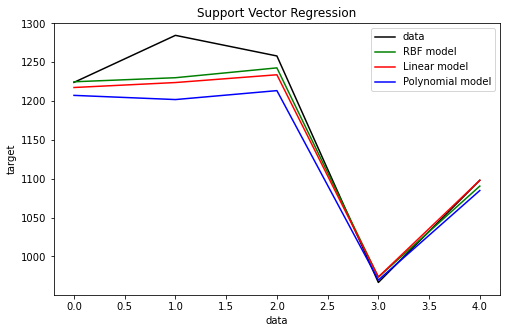

In [15]:
y_test=TargetVarScalerFit.inverse_transform(y_test)
y_rbf=TargetVarScalerFit.inverse_transform(y_rbf)
y_lin=TargetVarScalerFit.inverse_transform(y_lin)
y_poly=TargetVarScalerFit.inverse_transform(y_poly)

# look at the results
import pylab as pl

pl.plot(y_test, c='k', label='data')
pl.plot(y_rbf, c='g', label='RBF model')
pl.plot(y_lin, c='r', label='Linear model')
pl.plot(y_poly, c='b', label='Polynomial model')
pl.xlabel('data')
pl.ylabel('target')
pl.title('Support Vector Regression')
pl.legend()
pl.show()

In [16]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score #R square

def mape(y_test, Predictions):
    return np.mean(np.abs((y_test - Predictions) / y_test)) * 100
 
def smape(y_test, Predictions):
    return 2.0 * np.mean(np.abs(y_test - Predictions) / (np.abs(Predictions) + np.abs(y_test))) * 100
 
# y_true = np.array([1.0, 5.0, 4.0, 3.0, 2.0, 5.0, -3.0])
# y_pred = np.array([1.0, 4.5, 3.5, 5.0, 8.0, 4.5, 1.0])

In [17]:
MSE = metrics.mean_squared_error(y_test, y_rbf)
print( f"rbf_MSE = { MSE } ") 

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_rbf))
print(f"rbf_RMSE = { RMSE } ")

MAE = metrics.mean_absolute_error(y_test, y_rbf)
print(f"rbf_MAE = { MAE } ") 

MAPE = mape(y_test, y_rbf)
print(f"rbf_MAPE = { MAPE } ") # %

SMAPE = smape(y_test, y_rbf)
print(f"rbf_SMAPE = { SMAPE } ") # %

r2 = r2_score(y_test, y_rbf)
print(f"rbf_R-square = { r2 } " )

rbf_MSE = 662.1234492375174 
rbf_RMSE = 25.731759544141504 
rbf_MAE = 16.984762403324407 
rbf_MAPE = 10.874144374928214 
rbf_SMAPE = 10.853301032829345 
rbf_R-square = 0.9529066455549813 


In [18]:
MSE = metrics.mean_squared_error(y_test, y_lin)
print( f"lin_MSE = { MSE } ") 

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_lin))
print(f"lin_RMSE = { RMSE } ")

MAE = metrics.mean_absolute_error(y_test, y_lin)
print(f"lin_MAE = { MAE } ") 

MAPE = mape(y_test, y_lin)
print(f"lin_MAPE = { MAPE } ") # %

SMAPE = smape(y_test, y_lin)
print(f"lin_SMAPE = { SMAPE } ") # %

r2 = r2_score(y_test, y_lin)
print(f"lin_R-square = { r2 } " )

lin_MSE = 873.4384526891881 
lin_RMSE = 29.55399216162155 
lin_MAE = 19.72167224074269 
lin_MAPE = 10.741810460769203 
lin_SMAPE = 10.74133211891627 
lin_R-square = 0.9378769220667711 


In [19]:
MSE = metrics.mean_squared_error(y_test, y_poly)
print( f"poly_MSE = { MSE } ") 

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_poly))
print(f"poly_RMSE = { RMSE } ")

MAE = metrics.mean_absolute_error(y_test, y_poly)
print(f"poly_MAE = { MAE } ") 

MAPE = mape(y_test, y_poly)
print(f"poly_MAPE = { MAPE } ") # %

SMAPE = smape(y_test, y_poly)
print(f"poly_SMAPE = { SMAPE } ") # %

r2 = r2_score(y_test, y_poly)
print(f"poly_R-square = { r2 } " )

poly_MSE = 1856.6235248551347 
poly_RMSE = 43.08855445306949 
poly_MAE = 32.04534189161802 
poly_MAPE = 10.926943858596077 
poly_SMAPE = 11.045505596391838 
poly_R-square = 0.8679481449756081 


In [20]:
X_2040 = pd.read_csv('data/whole2040.csv')

In [21]:
X_2040

,pop,households,0_15,16_19,20_29,30_39,40_49,50_74,75_,ce_pop,gdp,temp,one,children,other,size
0,291397.54,133662.7,42119.35,11169.9,43885,45590,36963.93,84115,30360,6904.6,3800457,10.73,49710.24,26509.42,57443.04,2.26
1,291397.54,133662.7,42119.35,11169.9,43885,45590,36963.93,84115,30360,6904.6,3800457,11.23,49710.24,26509.42,57443.04,2.26


In [22]:
# Storing the fit object for later reference
PredictorScalerFit2040=PredictorScaler.fit(X_2040)

# Generating the standardized values of X and y
X_2040_svr=PredictorScalerFit2040.transform(X_2040)

In [23]:
# Generating Predictions on 2040 data
Predictions_rbf=svr_rbf.predict(X_2040_svr)
# Scaling the predicted Consumption data back to original Consumption scale
Predictions_rbf=TargetVarScalerFit.inverse_transform(Predictions_rbf)
print(Predictions_rbf)

[1089.91546321 1081.78114212]


In [24]:
# Generating Predictions on 2040 data
Predictions_lin=svr_lin.predict(X_2040_svr)
# Scaling the predicted Consumption data back to original Consumption scale
Predictions_lin=TargetVarScalerFit.inverse_transform(Predictions_lin)
print(Predictions_lin)

[1098.68529778 1095.82408517]


In [25]:
# Generating Predictions on 2040 data
Predictions_poly=svr_poly.predict(X_2040_svr)
# Scapolyg the predicted Consumption data back to original Consumption scale
Predictions_poly=TargetVarScalerFit.inverse_transform(Predictions_poly)
print(Predictions_poly)

[1079.57572986 1079.66169417]


In [35]:
EC = pd.read_csv('data/EC.csv')
CO2 = pd.read_csv('data/CO2.csv')

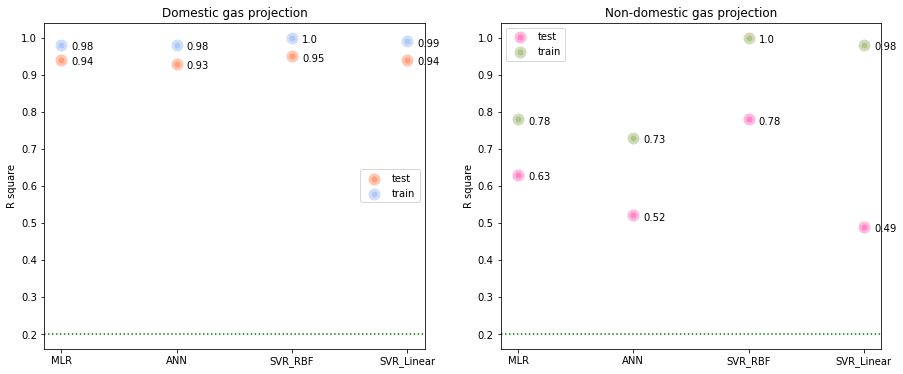

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

ax1.scatter(EC['index'], EC['R2_test_data'],alpha=0.3,linewidths=6, c='orangered', label='test')
ax1.scatter(EC['index'], EC['R2_train_data'],alpha=0.3, linewidths=6, c='cornflowerblue', label='train')
for i, txt in enumerate(EC['R2_test_data']):
    ax1.annotate(txt, 
                 (EC['index'][i], EC['R2_test_data'][i]),
                 textcoords="offset points", 
                 xytext=(10,-5), 
                 ha='left') 
for i, txt in enumerate(EC['R2_train_data']):
    ax1.annotate(txt, 
                 (EC['index'][i], EC['R2_train_data'][i]),
                 textcoords="offset points", 
                 xytext=(10,-5), 
                 ha='left') 
#ax1.axhline(y=0.9, color='orange', linestyle=':')
#ax1.axhline(y=0.8, color='y', linestyle=':')
#ax1.axhline(y=0.7, color='c', linestyle=':')
ax1.axhline(y=0.2, color='g', linestyle=':')
ax1.set_title('Domestic gas projection')
ax1.set_ylabel('R square')
ax1.legend()


ax2.scatter(CO2['index'], CO2['R2_test_data'],alpha=0.3,linewidths=6, c='deeppink', label='test')
ax2.scatter(CO2['index'], CO2['R2_train_data'],alpha=0.3, linewidths=6, c='olivedrab', label='train')
for i, txt in enumerate(CO2['R2_test_data']):
    ax2.annotate(txt, 
                 (CO2['index'][i], CO2['R2_test_data'][i]),
                 textcoords="offset points", 
                 xytext=(10,-5), 
                 ha='left') 
for i, txt in enumerate(CO2['R2_train_data']):
    ax2.annotate(txt, 
                 (CO2['index'][i], CO2['R2_train_data'][i]),
                 textcoords="offset points", 
                 xytext=(10,-5), 
                 ha='left') 
#plt.axhline(y=0.9, color='orange', linestyle=':')
#plt.axhline(y=0.8, color='y', linestyle=':')
#plt.axhline(y=0.7, color='c', linestyle=':')
plt.axhline(y=0.2, color='g', linestyle=':')
ax2.set_title('Non-domestic gas projection')
ax2.set_ylabel('R square')
ax2.legend()
plt.show()

In [43]:
EC = pd.read_csv('data/ECC.csv')
CO2 = pd.read_csv('data/CO22.csv')

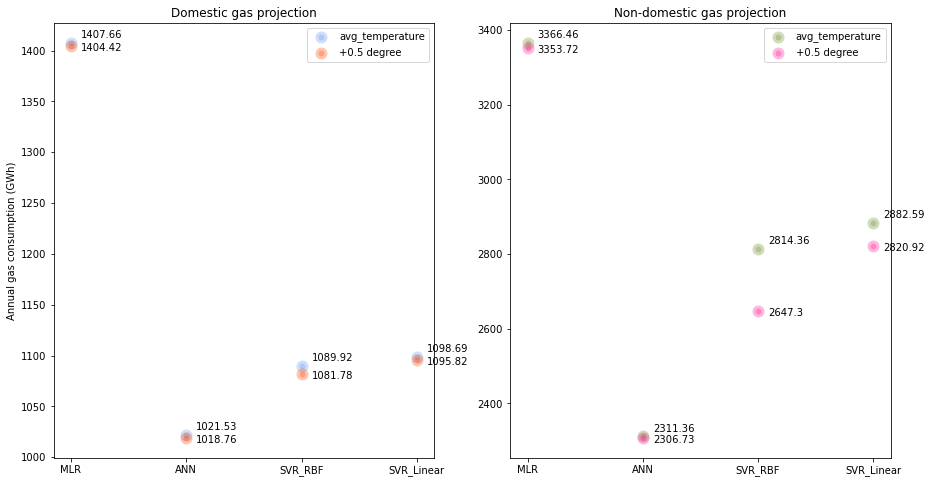

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))

ax1.scatter(EC['index'], EC['R2_train_data'],alpha=0.3, linewidths=6, c='cornflowerblue', label='avg_temperature')
ax1.scatter(EC['index'], EC['R2_test_data'],alpha=0.3,linewidths=6, c='orangered', label='+0.5 degree')

for i, txt in enumerate(EC['R2_test_data']):
    ax1.annotate(txt, 
                 (EC['index'][i], EC['R2_test_data'][i]),
                 textcoords="offset points", 
                 xytext=(10,-5), 
                 ha='left') 
for i, txt in enumerate(EC['R2_train_data']):
    ax1.annotate(txt, 
                 (EC['index'][i], EC['R2_train_data'][i]),
                 textcoords="offset points", 
                 xytext=(10,5), 
                 ha='left') 
#ax1.axhline(y=0.9, color='orange', linestyle=':')
#ax1.axhline(y=0.8, color='y', linestyle=':')
#ax1.axhline(y=0.7, color='c', linestyle=':')
#ax1.axhline(y=0.2, color='g', linestyle=':')
ax1.set_title('Domestic gas projection')
ax1.set_ylabel('Annual gas consumption (GWh)')
ax1.legend()

ax2.scatter(CO2['index'], CO2['R2_train_data'],alpha=0.3, linewidths=6, c='olivedrab', label='avg_temperature')
ax2.scatter(CO2['index'], CO2['R2_test_data'],alpha=0.3,linewidths=6, c='deeppink', label='+0.5 degree')

for i, txt in enumerate(CO2['R2_test_data']):
    ax2.annotate(txt, 
                 (CO2['index'][i], CO2['R2_test_data'][i]),
                 textcoords="offset points", 
                 xytext=(10,-5), 
                 ha='left') 
for i, txt in enumerate(CO2['R2_train_data']):
    ax2.annotate(txt, 
                 (CO2['index'][i], CO2['R2_train_data'][i]),
                 textcoords="offset points", 
                 xytext=(10,5), 
                 ha='left') 
#plt.axhline(y=0.9, color='orange', linestyle=':')
#plt.axhline(y=0.8, color='y', linestyle=':')
#plt.axhline(y=0.7, color='c', linestyle=':')
#plt.axhline(y=0.2, color='g', linestyle=':')
ax2.set_title('Non-domestic gas projection')
#ax2.set_ylabel('Annual gas consumption (GWh)')
ax2.legend()
plt.show()